# Compare Means

A T-test lets us compare a categorical and a continuous variable by comparing the mean of the continuous variable by subgroups based on the categorical variable.

A t-test can help us answer questions like:

- Are the salaries of the marketing department higher than the company average?
- Do customers that receive marketing emails spend more money?
- Are sales for product A higher when we run a promotion for it?

In this lesson we will explore the one sample t-test, which lets us compare a subgroup against the population, and the two sample t-test, which allows us to compare subgroups.

For this lesson we will look at a dataset that contains student's scores on an exam:

In [1]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import viz # curriculum visualization examples

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

df.study_strategy.fillna('None', inplace=True)

In [2]:
df.shape

(40, 6)

In [3]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,None,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


## One Sample T-Test

The one sample t-test lets us compare the mean for a specific subgroup against the population mean.

The t-statistic is given by:

$$ t = \frac{\bar{x} - \mu}{s / \sqrt{n}} $$

The null hypothesis is that there is no difference in the means. For our example, we'll compare the exam scores of left-handed people against the entire population.

- $H_0$: there is no difference between left-handers exam scores and the overall average.
- $H_1$: there is a difference between left-handers exam scores and the overall average.

One of the assumptions of the t-test is that the continuous variable is normally distributed. To check this, we can make a quick visualization:

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='exam_score', ylabel='Density'>

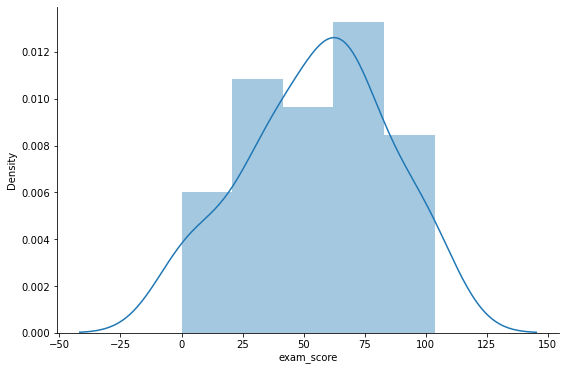

In [4]:
import seaborn as sns

sns.distplot(df.exam_score)

And compare the mean and median

In [5]:
df.exam_score.mean(), df.exam_score.median()

(55.28336550715703, 58.35658448399582)

For our purposes, we'll say this is close enough to normal.

We can now write some Python code to calculate our t-statistic.

In [6]:
lefties = df[df.handedness == 'left']

μ = df.exam_score.mean()
xbar = lefties.exam_score.mean()
s = lefties.exam_score.std()
n = lefties.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))
t

0.4918055294046799

If the null hypothesis is true, our t-scores will follow a normal distribution and will be centered around 0. That is, if the null hypothesis is true, and we ran our experiment many many times, we would expect to get slightly different t-statistics each time. If we plotted the resulting t-statistics we would expect to see an approximitely normal curve.

Our null hypothesis corresponds to a t-score of 0 (if there is no difference in the means, the numerator in our t calculation would come out to 0).

We can visualize our results:

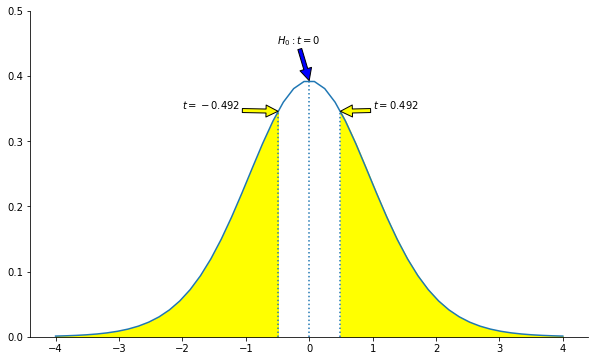

In [7]:
viz.compare_means_example1(df)

The p value is the probability that we observed the t-statistic that we did, or a more extreme value, which is the area under the curve shaded in yellow.

We call this a *two-tailed* test, as we are testing for more extreme values in both the positive and negative directions.

In [8]:
p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test
p

0.6295357651101645

If there is no difference between left-handers average exam score and the overall population average, there is about a 63% chance we would observe the data that we have (or more extreme data).

In [9]:
print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 0.492
p = 0.630


In [10]:
t, p = stats.ttest_1samp(lefties.exam_score, df.exam_score.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 0.492
p = 0.630


## Two Sample T-Test

We can also use a t-test to compare the means between two different supgroups. The calculation of the test statistic for this test is:

$$ t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$

Where $s_p$ is the pooled standard deviation, and is given by:

$$ s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 -2}} $$

First we'll setup our hypothesis:

- $H_0$: There is no difference in the exam scores for those who studied with flashcards and those who didn't.
- $H_1$: There is a difference in the exam scores for those who studied with flashcards and those who didn't.

And then write the code to calculate our test statistic.

In [11]:
x1 = df[df.study_strategy == 'flashcards'].exam_score
x2 = df[df.study_strategy != 'flashcards'].exam_score

xbar1 = x1.mean()
xbar2 = x2.mean()

n1 = x1.shape[0]
n2 = x2.shape[0]

s1 = x1.std()
s2 = x2.std()

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t

4.8153537860387745

Our p-value is the probability of observing the the above t-statistic (or a more extreme statistic) if the null hypothesis is true. This is equivalent to the area under the normal curve on the two tails, greater or less than our test statistic and its opposite.

We can visualize this as well:

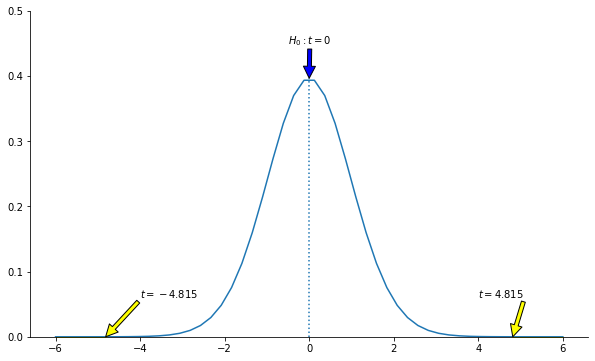

In [12]:
viz.compare_means_example2(df)

Based on our visualization we know that we will likely have a very small p-value, and we can confirm this:

In [13]:
p = stats.t(degf).sf(t) * 2

print(f't = {t:.5f}')
print(f'p = {p:.5f}')

t = 4.81535
p = 0.00002


In [14]:
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=4.815353786038775, pvalue=2.359649566208761e-05)

The following assumptions are made by the two sample t-test described above:

1. The data follows the normal probability distribution.  
2. The variances of the two populations are equal.  
3. The two samples are independent. There is no relationship between the individuals in one sample as compared to the other.

## Exercises

Continue working in your `hypothesis_testing` notebook.

- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.  A sample of 40 sales from office #1 revealed a mean of 90 days and a standard  deviation of 15 days. A sample of 50 sales from office #2 revealed  a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- Load the `mpg` dataset and use it to answer the following questions:

    - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    - Are compact cars more fuel-efficient than the average car?
    - Do manual cars get better gas mileage than automatic cars?